# Bike Sharing Dataset Analysis

## Introduction
In this notebook, we will analyze the Bike Sharing Dataset. This dataset contains information about daily bike rentals in a city, including weather conditions and other factors. Our goal is to uncover insights and patterns in the data that can help understand the factors influencing bike rentals.

## Table of Contents
1. [Data Loading and Preprocessing](#data-loading-and-preprocessing)
2. [Exploratory Data Analysis](#exploratory-data-analysis)
3. [Modeling and Predictions](#modeling-and-predictions)
4. [Conclusion](#conclusion)

## Data Loading and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

file_path = './day.csv'
bike_data = pd.read_csv(file_path)

bike_data['dteday'] = pd.to_datetime(bike_data['dteday'])

bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Exploratory Data Analysis

### Summary Statistics

In [2]:
bike_data.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


### Data Distribution

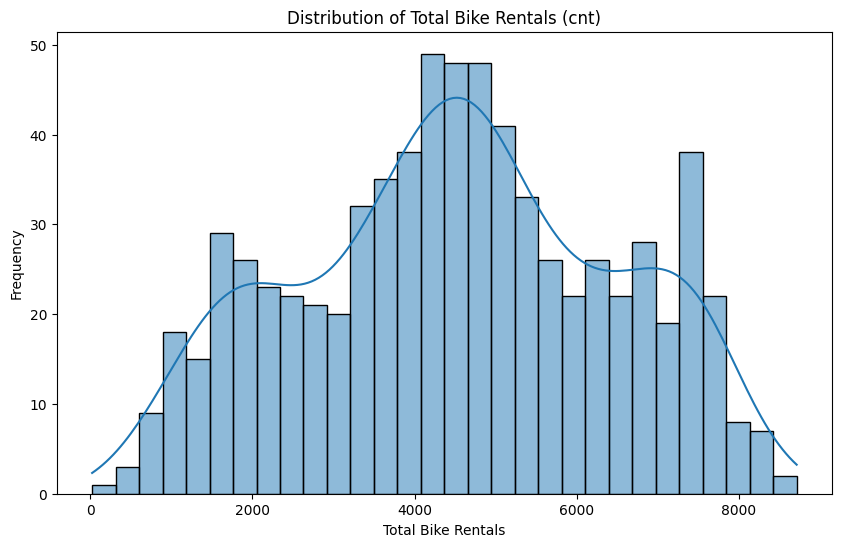

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(bike_data['cnt'], bins=30, kde=True)
plt.title('Distribution of Total Bike Rentals (cnt)')
plt.xlabel('Total Bike Rentals')
plt.ylabel('Frequency')
plt.show()

### Temporal Analysis

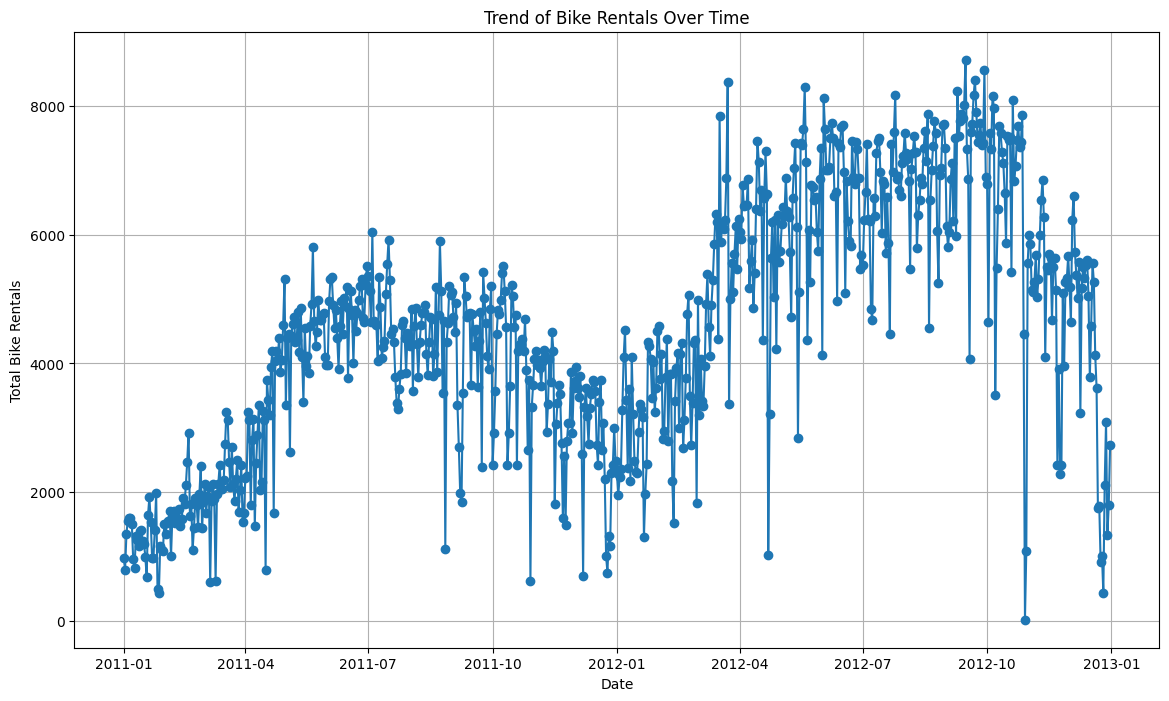

In [4]:
plt.figure(figsize=(14, 8))
plt.plot(bike_data['dteday'], bike_data['cnt'], marker='o', linestyle='-')
plt.title('Trend of Bike Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Total Bike Rentals')
plt.grid(True)
plt.show()

### Seasonal Analysis

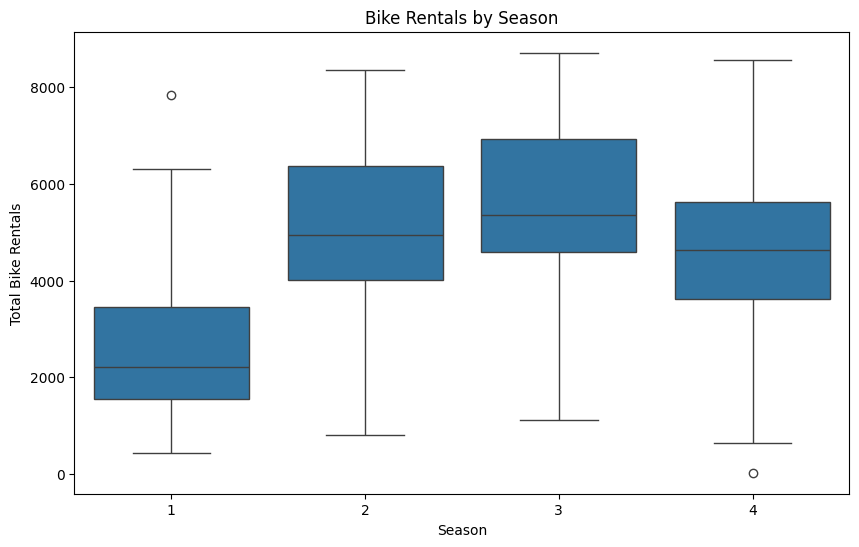

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=bike_data, x='season', y='cnt')
plt.title('Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Total Bike Rentals')
plt.show()

### Weekday Analysis

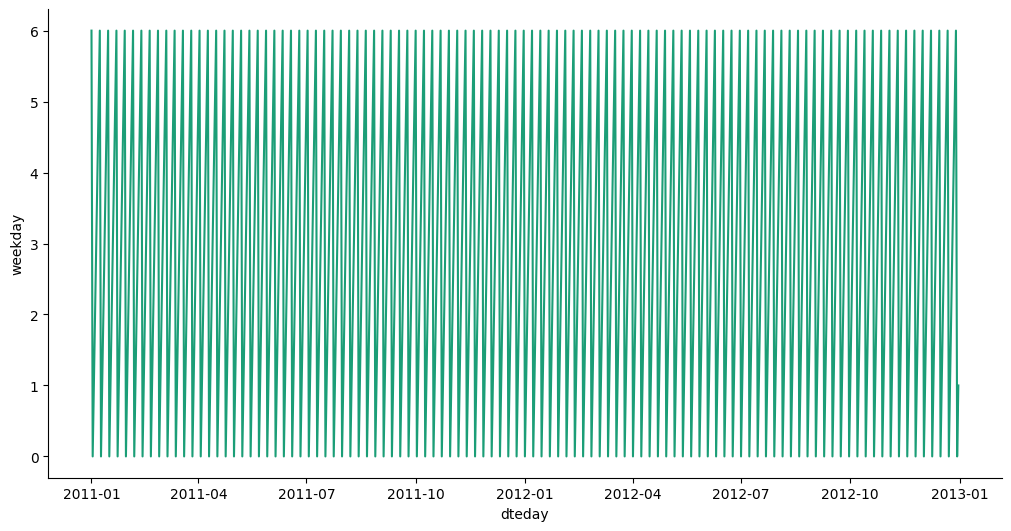

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['dteday']
  ys = series['weekday']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = bike_data.sort_values('dteday', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('dteday')
_ = plt.ylabel('weekday')

### Holiday Analysis

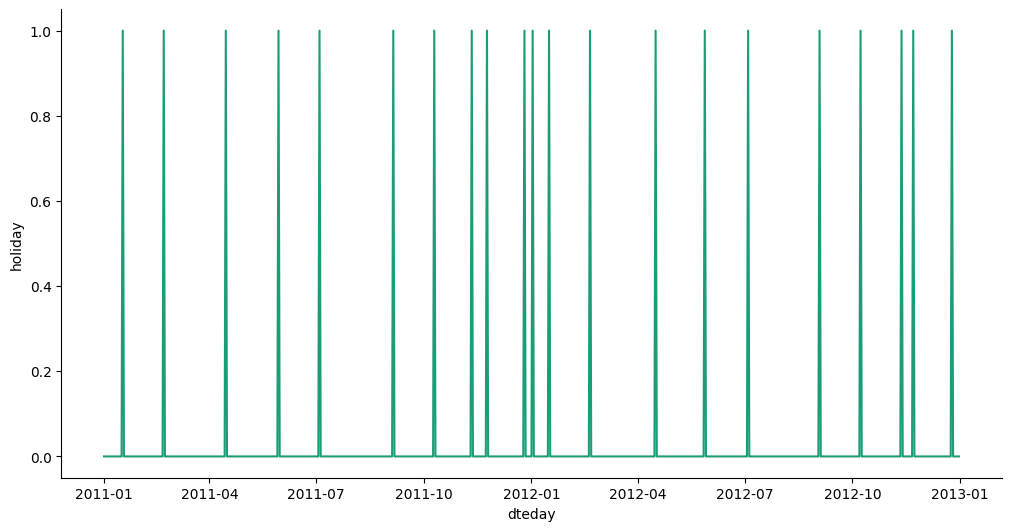

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['dteday']
  ys = series['holiday']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = bike_data.sort_values('dteday', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('dteday')
_ = plt.ylabel('holiday')

### Monthly Analysis

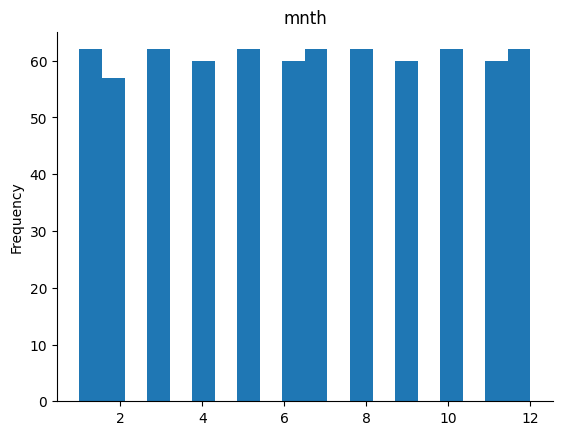

In [15]:
from matplotlib import pyplot as plt
bike_data['mnth'].plot(kind='hist', bins=20, title='mnth')
plt.gca().spines[['top', 'right',]].set_visible(False)

### Correlation Heatmap

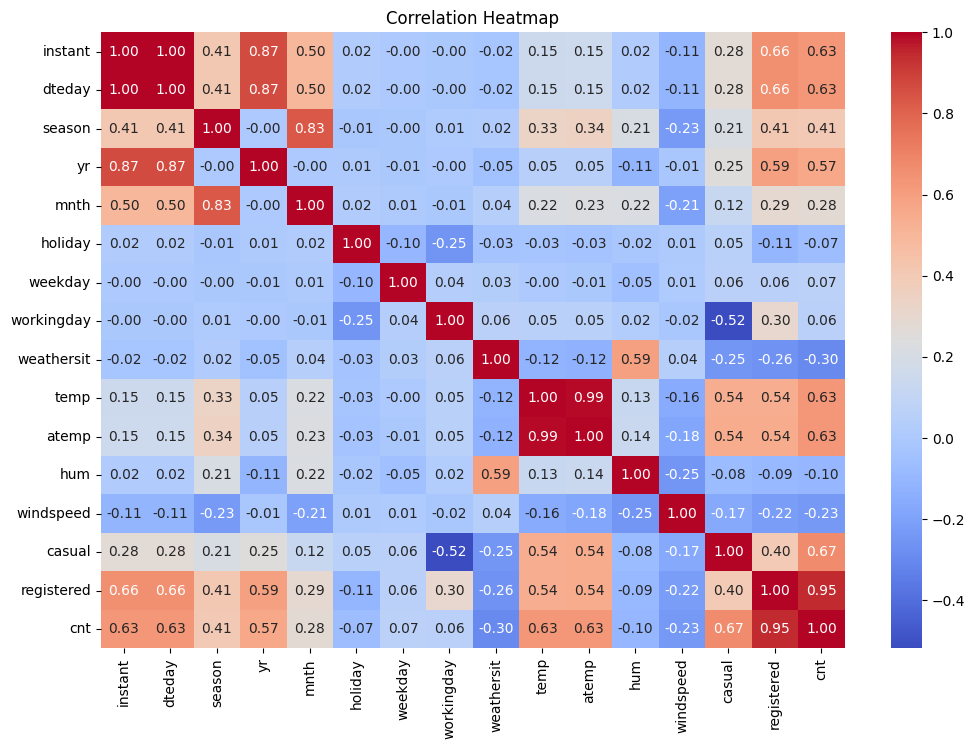

In [6]:
plt.figure(figsize=(12, 8))
corr_matrix = bike_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Pairplot Analysis

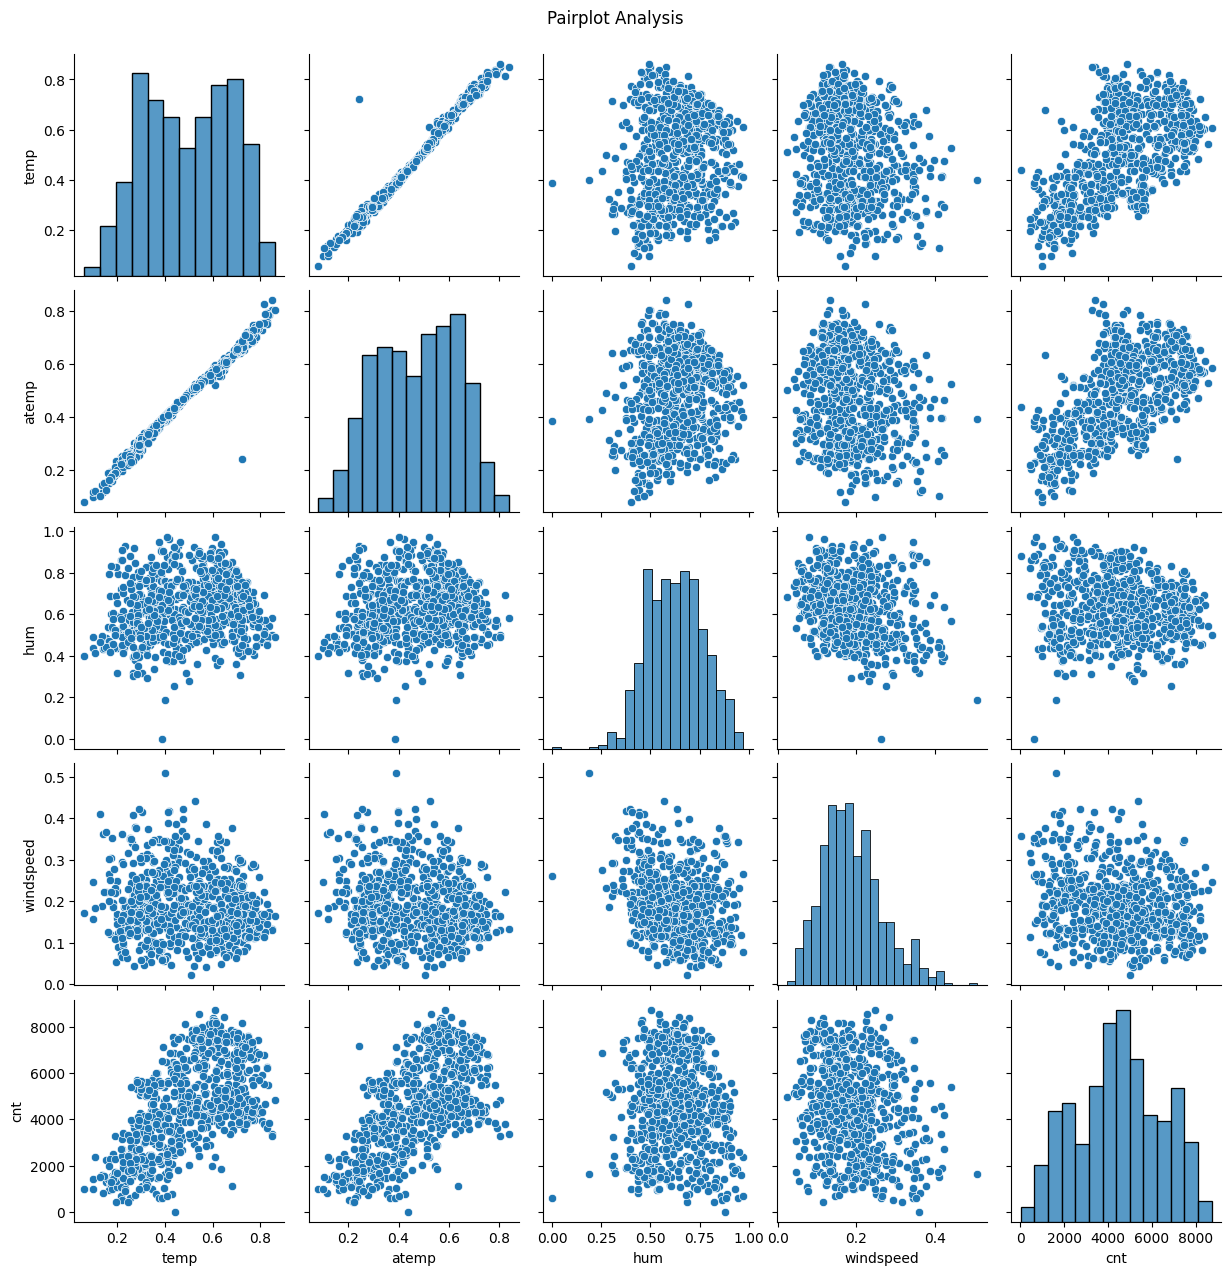

In [7]:
sns.pairplot(bike_data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])
plt.suptitle('Pairplot Analysis', y=1.02)
plt.show()

## Modeling and Predictions

### Linear Regression Model

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = bike_data[['temp', 'atemp', 'hum', 'windspeed']]
y = bike_data['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 2007059.49
R-squared: 0.50


## Conclusion
In this notebook, we explored the Bike Sharing Dataset, performed data preprocessing, conducted exploratory data analysis, and visualized relationships between different variables. We also built a simple linear regression model to predict bike rentals based on weather conditions. Further analysis can include more advanced machine learning models and feature engineering to improve predictive performance.